In [1]:
from preprocess import *
from model import *

In [2]:
model_dir = "./models/"

In [3]:
LETTER_net = Net(26)
NUM_net = Net(10)
LETTER_net.load_state_dict(torch.load(model_dir + "letter_model.ckpt"))
NUM_net.load_state_dict(torch.load(model_dir + "number_model.ckpt"))

<All keys matched successfully>

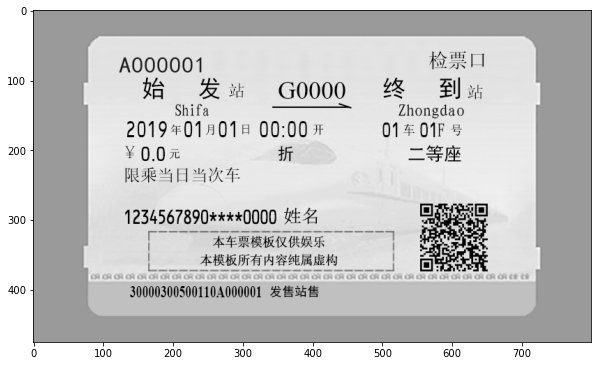

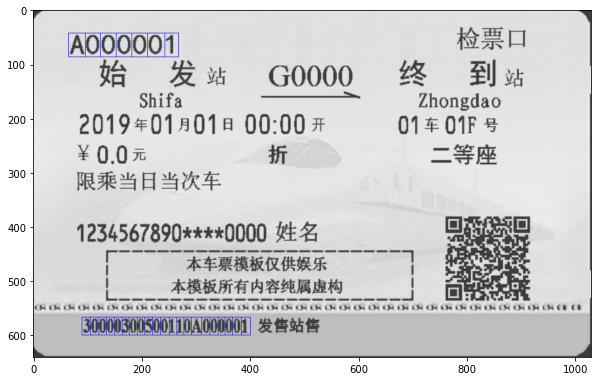

A000001 30000300500110A000001


In [6]:
#在网络上找的图的定位效果
img = cv2.imread("test.png")

gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) #灰度图

plt.figure(figsize=(10,8))
plt.imshow(gray_img,cmap = "gray")
plt.show()

copy1 = np.copy(gray_img)
copy1[gray_img < 170] = 60 #原本背景是灰色的，二值化无法处理前景和背景

copy2 = np.copy(gray_img)
copy2[gray_img < 170] = 30 #原本背景是灰色的，二值化无法处理前景和背景


copy1 = cv2.cvtColor(copy1, cv2.COLOR_GRAY2RGB)
copy1 = align_pic(copy1)

copy2 = cv2.cvtColor(copy2, cv2.COLOR_GRAY2RGB)
copy2 = align_pic(copy2)

z,w = locate_top_pic(copy1)
x,y = locate_bottom_pic(copy2)
seg_pic = np.copy(copy1)
seg_pic = draw_rect(seg_pic,*x)
seg_pic = draw_rect(seg_pic,*z)
plt.figure(figsize=(10,8))
plt.imshow(seg_pic,cmap = "gray")
plt.show()

#顶部七位码不满足灰度值的先验条件，因为刚刚预处理时被设置为存黑色了，所以没法检测

top_string = ""
if len(w)  != 0:
    for idx ,img in enumerate(w):
        img = cv2.resize(img,(28,28),interpolation=cv2.INTER_NEAREST)
        if idx == 0:
            output = eval(LETTER_net,img)
            ch = chr(output + ord('A'))#将标签修改为字母
            top_string += ch
        else:
            output = eval(NUM_net,img)
            top_string += str(output)

bottom_string = ""
if len(y) != 0:
    for idx, img in enumerate(y):
        img = cv2.resize(img,(28,28),interpolation=cv2.INTER_NEAREST)
        if idx == 14:
            output = eval(LETTER_net,img)
            ch = chr(output + ord('A')) #将标签修改为字母
            bottom_string += ch
        else:
            output = eval(NUM_net,img)
            bottom_string += str(output)
print(top_string,bottom_string)